In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def show_contours(objective,
                 xlims=[-10, 10],
                 ylims=[-10, 10],
                 xticks = 100,
                 yticks=100):
    x_step = (xlims[1] - xlims[0]) / xticks
    y_step = (ylims[1] - ylims[0]) / yticks
    X, Y = np.mgrid[xlims[0]:xlims[1]:x_step, ylims[0]:ylims[1]:y_step]
    res = []
    for x_idx in range(X.shape[0]):
        res.append([])
        for y_idx in range(X.shape[1]):
            x_val = X[x_idx, y_idx]
            y_val = Y[x_idx, y_idx]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7, 7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    
def parabola(variable):
    return np.array([10 * (variable[0] ** 2), 4 * (variable[1] ** 3)], dtype=np.int8).sum()

def make_grad_step(function, variable):
    func_result = function(variable)
    func_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

def function_skewed(variable):
    gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
    return res

def function_skewed_np(variable):
    gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.transpose(1, 0) @ (gramma @ variable)).sum()
    return res


In [4]:
device = torch.device('cuda:0')

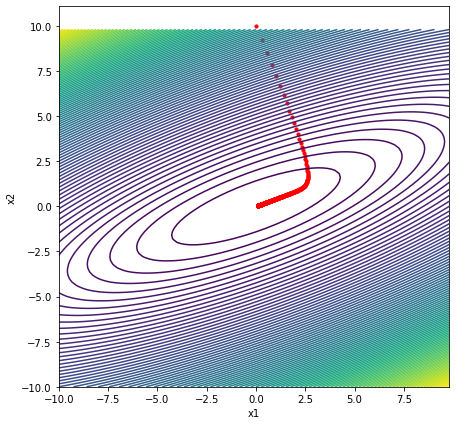

In [61]:
x = torch.tensor(
                [-0., 10.], requires_grad=True, 
)
var_hist = []
fh_hist = []


for i in range(500):
    var_hist.append(x.data.cpu().numpy().copy())
    fh_hist.append(function_skewed(x).data.cpu().numpy().copy())
    make_grad_step(function_skewed, x)

show_contours(function_skewed_np)
plt.scatter(np.array(var_hist)[:,0], np.array(var_hist)[:,1], s=10, c='r');